* ### Spatial segregation - Preferred separation of groups of people in a particular territory by lines of race, caste, ethnicity, language, religion or income status.

* ### In Spatial Segregation, people tend to migrate to other places where they have more neighbors who are like them. 

#### Let’s take an example – Assume you went to a foreign country for living and you are deciding where to take the house. So you will more likely to choose a place or locality where your neighbors are from your country and speaks the same language as yours and not a place where people are from a different country and speaks a different language. This is spatial segregation.

#### But sometimes it is not possible to have all neighbors as same as you. So for that, we can have some threshold value for similar neighbors to stay there.

#### Let’s take an example – Assume there is a total of 9 houses in your locality including yours and let’s say there is a threshold of 3 which means that at least 3 houses should be similar to you.

#### This spatial segregation has been modeled and this model is known as the Schelling Model. In the Schelling model, there is a grid having 2 different types of people and simulation describes how spatial segregation has been done using a wonderful model.

* ## Schelling's Model of Segregation
http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/

* ## Structural Balance

* ### Structural Balance between 3 nodes
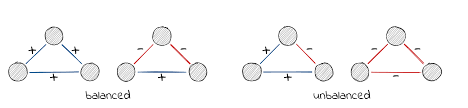

* ### In a graph, there's only 2 possible structurally equivalent configurations :
#### 1. All positives
#### 2. Intra group positive, Inter group negative (2 groups)



* ### In a graph having n nodes, there can be nC3 triangles, which is equal to n(n-1)(n-2)/6

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

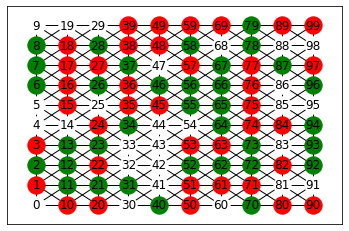

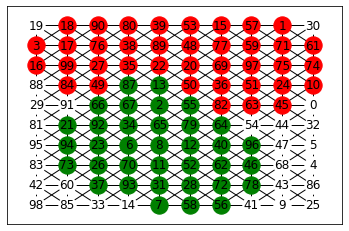

In [ ]:
# Creating the grid
N= 10
G= nx.grid_2d_graph(N,N)
pos= dict((n,n) for n in G.nodes())
labels= dict(((i,j), i*10+j) for i,j in G.nodes())


# Assigning types to nodes
for n in G.nodes():
  G.nodes[n]['type']= random.randint(0,2)

type1_node_list= [n for (n,d) in G.nodes(data=True) if d['type']==1]
type2_node_list= [n for (n,d) in G.nodes(data=True) if d['type']==2]
empty_cells= [n for (n,d) in G.nodes(data=True) if d['type']==0]


# Coloring the 3 types of nodes and displaying the graph
def display_graph(G):
  nodes_g= nx.draw_networkx_nodes(G, pos, node_color= 'green', nodelist= type1_node_list)
  nodes_r= nx.draw_networkx_nodes(G, pos, node_color= 'red', nodelist= type2_node_list)
  nodes_w= nx.draw_networkx_nodes(G, pos, node_color= 'white', nodelist= empty_cells)

  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos, labels=labels)
  plt.show()


# List of boundary nodes
def get_boundary_nodes(G):
  boundary_nodes_list= []

  for ((u,v),d) in G.nodes(data= True):
    if u==0 or u==N-1 or v==0 or v==N-1:
      boundary_nodes_list.append((u,v))

  return boundary_nodes_list


# List of internal nodes
boundary_nodes_list= get_boundary_nodes(G)
internal_nodes_list= list(set(G.nodes()) - set(boundary_nodes_list))


# Assigning diagonal edges
for (u,v) in G.nodes():
  if (u+1 <= N-1) and (v+1 <= N-1):
    G.add_edge((u,v),(u+1,v+1))

for (u,v) in G.nodes():
  if (u+1 <= N-1) and (v-1 >= 0):
    G.add_edge((u,v),(u+1,v-1))


# List of neighbors of internal nodes
def get_neigh_for_internal(u,v):
  return [(u-1,v), (u+1,v), (u,v-1), (u,v+1), (u-1,v+1), (u+1,v-1), (u-1,v-1), (u+1,v+1)]

# List of neighbors of boundary nodes
def get_neigh_for_boundary(u,v):

  if u==0 and v==0:
    return [(0,1),(1,1),(1,0)]
  
  elif u==N-1 and v==N-1:
    return [(N-2,N-2), (N-1,N-2), (N-2,N-1)]
  
  elif u==N-1 and v==0:
    return [(u-1,v), (u,v+1), (u-1,v+1)]
  
  elif u==0 and v==N-1:
    return [(u+1,v), (u+1,v-1), (u,v-1)]

  elif u==0:
    return [(u,v-1), (u,v+1), (u+1,v), (u+1,v-1), (u+1,v+1)]

  elif u==N-1:
    return [(u-1,v), (u,v-1), (u,v+1), (u-1,v+1), (u-1,v-1)]
  
  elif v==N-1:
    return [(u,v-1), (u-1,v), (u+1,v), (u-1,v-1), (u+1,v-1)]
  
  elif v==0:
    return [(u-1,v), (u+1,v), (u,v+1), (u-1,v+1), (u+1,v+1)]


# List of unsatisfied nodes
def get_unsatisfied_nodes_list(G, boundary_nodes_list, internal_nodes_list):
  unsatisfied_nodes_list= []
  similar_nodes=0
  t=3

  for u,v in G.nodes():
    type_of_this_node= G.nodes[(u,v)]['type']

    if type_of_this_node==0:
      continue

    else:
      similar_nodes= 0
      if (u,v) in internal_nodes_list:
        neigh= get_neigh_for_internal(u,v)
      elif (u,v) in boundary_nodes_list:
        neigh= get_neigh_for_boundary(u,v)

      for each in neigh:
        if G.nodes[each]['type']==type_of_this_node:
          similar_nodes+=1

      if similar_nodes<=t:
        unsatisfied_nodes_list.append((u,v))

  return unsatisfied_nodes_list


# Moving the unsatisfied node to an empty position to make it satisfied
def make_a_node_satisfied(unsatisfied_nodes_list, empty_cells):
  if len(unsatisfied_nodes_list)!=0:
    node_to_shift= random.choice(unsatisfied_nodes_list)
    new_position= random.choice(empty_cells)

    G.nodes[new_position]['type']= G.nodes[node_to_shift]['type']
    G.nodes[node_to_shift]['type']= 0
    labels[node_to_shift], labels[new_position]= labels[new_position], labels[node_to_shift]
  
  else:
    pass


display_graph(G)

# Iterating to make the nodes satisfied
for i in range(5000):

  unsatisfied_nodes_list= get_unsatisfied_nodes_list(G, boundary_nodes_list, internal_nodes_list)
  #print(unsatisfied_nodes_list)

  make_a_node_satisfied(unsatisfied_nodes_list, empty_cells)
  type1_node_list= [n for (n,d) in G.nodes(data=True) if d['type']==1]
  type2_node_list= [n for (n,d) in G.nodes(data=True) if d['type']==2]
  empty_cells= [n for (n,d) in G.nodes(data=True) if d['type']==0]  

display_graph(G)

In [ ]:
import itertools

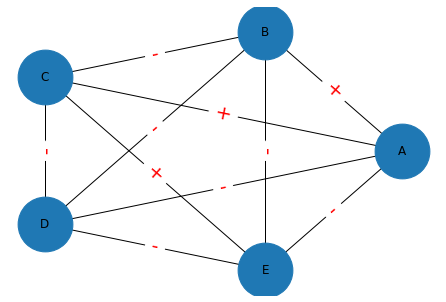

In [ ]:
# 1. Create a graph with 'n' node, where the nodes are countries.

G= nx.Graph()
n= 5
G.add_nodes_from([i for i in range(1,n+1)])

mapping= {1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F', 7:'G', 8:'H', 9:'I', 10:'J', 11:'K', 12:'L', 13:'M', 14:'N', 15:'O'}
G= nx.relabel_nodes(G,mapping)


# 2. Make it a complete graph by adding all possible edges. Assign '+' or '-' signs as weights to all the edges randomly.

signs= ['+','-']
for i in G.nodes():
  for j in G.nodes():
    if i!=j:
      G.add_edge(i,j, sign= random.choice(signs))


# 3. Display the network

edge_labels= nx.get_edge_attributes(G, 'sign')
pos= nx.circular_layout(G)
nx.draw(G, pos, node_size=3000, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels= edge_labels, font_size=20, font_color='red')
plt.show()

In [ ]:
# 4.1 Get a list of all the triangles in the network.

nodes= G.nodes()
tris_list= [list(x) for x in itertools.combinations(nodes,3)]


# 4.2 Store the sign details of all the triangles.

def get_signs_of_tris(trislist,G):
  all_signs= []
  for i in range(len(tris_list)):
    temp= []
    temp.append(G[tris_list[i][0]][tris_list[i][1]]['sign'])
    temp.append(G[tris_list[i][1]][tris_list[i][2]]['sign'])
    temp.append(G[tris_list[i][2]][tris_list[i][0]]['sign'])
    all_signs.append(temp)
  return all_signs

all_signs= get_signs_of_tris(tris_list, G)


# 4.3 Count the number of unstable triangles in the network.

def count_unstable(all_signs):
  stable=0
  unstable=0
  for i in range(len(all_signs)):
    if all_signs[i].count('+')==3 or all_signs[i].count('+')==1:
      stable+=1
    if all_signs[i].count('+')==2 or all_signs[i].count('+')==0:
      unstable+=1
  #print('Stable : ',stable,' Unstable : ', unstable)
  return unstable 

unstable= count_unstable(all_signs)
unstable_track= [unstable]

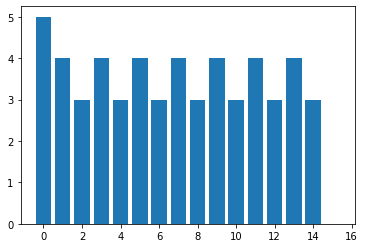

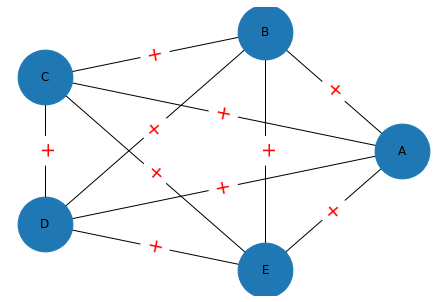

In [ ]:
# 5. While the number of unstable triangles is not zero, do the following:
# 5.1. Choose a triangle in the graph that is unstable.
# 5.2. Make that triangle stable.
# 5.3. Count the number os unstable triangles.


def move_a_tri_to_stable(G, tris_list, all_signs):
  found_unstable= False

  while(found_unstable==False):
    index= random.randint(0,len(tris_list)-1)

    if all_signs[index].count('+')==2 or all_signs[index].count('+')==0:
      found_unstable= True
    else:
      continue
    
  # Move triangle from unstable state to stable state
  r= random.randint(1,3)
  if all_signs[index].count('+')==2:
    if r==1:
      if G[tris_list[index][0]][tris_list[index][1]]['sign']=='+':
        G[tris_list[index][0]][tris_list[index][1]]['sign']='-'
      elif G[tris_list[index][0]][tris_list[index][1]]['sign']=='-':
        G[tris_list[index][0]][tris_list[index][1]]['sign']='+'
    
    elif r==2:
      if G[tris_list[index][1]][tris_list[index][2]]['sign']=='+':
        G[tris_list[index][1]][tris_list[index][2]]['sign']='-'
      elif G[tris_list[index][1]][tris_list[index][2]]['sign']=='-':
        G[tris_list[index][1]][tris_list[index][2]]['sign']='+'

    elif r==3:
      if G[tris_list[index][2]][tris_list[index][0]]['sign']=='+':
        G[tris_list[index][2]][tris_list[index][0]]['sign']='-'
      elif G[tris_list[index][2]][tris_list[index][0]]['sign']=='-':
        G[tris_list[index][2]][tris_list[index][0]]['sign']='+'
    
  elif all_signs[index].count('+')==0:
    if r==1:
      G[tris_list[index][0]][tris_list[index][1]]['sign']='+'

    elif r==2:
      G[tris_list[index][1]][tris_list[index][2]]['sign']='+'

    elif r==3:
      G[tris_list[index][2]][tris_list[index][0]]['sign']='+'

  return G

while(unstable!=0):
  G= move_a_tri_to_stable(G, tris_list, all_signs)
  all_signs= get_signs_of_tris(tris_list, G)
  unstable= count_unstable(all_signs)
  unstable_track.append(unstable)

# Change in number of unstable triangles
plt.bar([i for i in range(len(unstable_track))], unstable_track)
plt.show()

edge_labels= nx.get_edge_attributes(G, 'sign')
pos= nx.circular_layout(G)
nx.draw(G, pos, node_size=3000, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels= edge_labels, font_size=20, font_color='red')
plt.show()

In [ ]:
# 6. Now that there is no unstable triangle in the network, it can be divided into two coalitions, such that in each coalition, the intra-edges are positive, and the inter-edges are negative.
# 6.1. Choose a random node. Add it to the first coalition.
# 6.2. Also put all the 'friends' of this node in the first coalition.
# 6.3. Put all the 'enemies' of this node in the second coalition.
# 6.4. Repeat steps 6.2 and 6.3 for all the 'unprocessed' nodes of first coalition.

def see_coalitions(G):
  first_coalition= []
  second_coalition= []

  nodes= list(G.nodes())
  r= random.choice(nodes)

  first_coalition.append(r)

  processed_nodes= []
  to_be_processed= [r]

  for each in to_be_processed:
    if each not in processed_nodes:
      neigh= list(G.neighbors(each))

      for i in range(len(neigh)):
        if G[each][neigh[i]]['sign']=='+':
          
          if neigh[i] not in first_coalition:
            first_coalition.append(neigh[i])
          if neigh[i] not in to_be_processed:
            to_be_processed.append(neigh[i])
        
        elif G[each][neigh[i]]['sign']=='-':
          if neigh[i] not in second_coalition:
            second_coalition.append(neigh[i])
            processed_nodes.append(neigh[i])
        
      processed_nodes.append(each)
  return first_coalition, second_coalition

first, second= see_coalitions(G)
print(first, second)

['C', 'A', 'B', 'D', 'E'] []


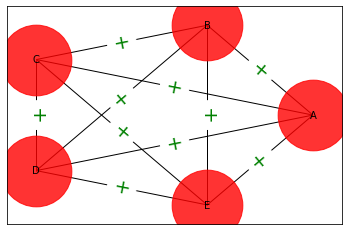

In [ ]:
# 7. Display the network with coalitions

edge_labels= nx.get_edge_attributes(G, 'sign')

pos= nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist= first, node_color= 'red', node_size= 5000, alpha= 0.8)
nx.draw_networkx_nodes(G, pos, nodelist= second, node_color= 'blue', node_size= 5000, alpha= 0.8)

nx.draw_networkx_labels(G, pos, font_size= 10, font_family= 'sans-serif')

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels= edge_labels, font_size= 20, font_color= 'green')

plt.show()